In [218]:
import pandas as pd
import pandas_datareader as web
from fbprophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns


In [219]:
df=pd.read_csv('/Users/patrick/Downloads/BITSTAMP_BTCUSD, 1D.csv')  

In [220]:
df['time'] = pd.to_datetime(df['time']).dt.tz_localize(None)
df['time'] = df['time']#.dt.tz_localize(None)
df.index = df['time']
#df.drop('time', axis=1, inplace=True)
df = df[['close','time']]

In [221]:
df['pct_change'] = df['close'].pct_change()
df

,close,time,pct_change
time,,,
2015-02-25,237.97,2015-02-25,NaN
2015-02-26,236.84,2015-02-26,-0.004748
2015-02-27,252.78,2015-02-27,0.067303
2015-02-28,253.47,2015-02-28,0.002730
2015-03-01,258.34,2015-03-01,0.019213
...,...,...,...
2021-10-23,61338.76,2021-10-23,0.010479
2021-10-24,60910.16,2021-10-24,-0.006987
2021-10-25,63101.43,2021-10-25,0.035975


In [222]:

df['year'] =pd.DatetimeIndex(df['time']).year
df['quarter'] =pd.DatetimeIndex(df['time']).quarter
df['month'] =pd.DatetimeIndex(df['time']).month
df['weekofyear'] =pd.DatetimeIndex(df['time']).isocalendar().week
df['day_of_month'] =pd.DatetimeIndex(df['time']).day
df['dayofweek'] =pd.DatetimeIndex(df['time']).dayofweek
df['weekday'] =pd.DatetimeIndex(df['time']).day_name()

df

,close,time,pct_change,year,quarter,month,weekofyear,day_of_month,dayofweek,weekday
time,,,,,,,,,,
2015-02-25,237.97,2015-02-25,NaN,2015,1,2,9,25,2,Wednesday
2015-02-26,236.84,2015-02-26,-0.004748,2015,1,2,9,26,3,Thursday
2015-02-27,252.78,2015-02-27,0.067303,2015,1,2,9,27,4,Friday
2015-02-28,253.47,2015-02-28,0.002730,2015,1,2,9,28,5,Saturday
2015-03-01,258.34,2015-03-01,0.019213,2015,1,3,9,1,6,Sunday
...,...,...,...,...,...,...,...,...,...,...
2021-10-23,61338.76,2021-10-23,0.010479,2021,4,10,42,23,5,Saturday
2021-10-24,60910.16,2021-10-24,-0.006987,2021,4,10,42,24,6,Sunday
2021-10-25,63101.43,2021-10-25,0.035975,2021,4,10,43,25,0,Monday


In [223]:
df.drop('time', axis=1, inplace=True)

In [224]:
df

,close,pct_change,year,quarter,month,weekofyear,day_of_month,dayofweek,weekday
time,,,,,,,,,
2015-02-25,237.97,NaN,2015,1,2,9,25,2,Wednesday
2015-02-26,236.84,-0.004748,2015,1,2,9,26,3,Thursday
2015-02-27,252.78,0.067303,2015,1,2,9,27,4,Friday
2015-02-28,253.47,0.002730,2015,1,2,9,28,5,Saturday
2015-03-01,258.34,0.019213,2015,1,3,9,1,6,Sunday
...,...,...,...,...,...,...,...,...,...
2021-10-23,61338.76,0.010479,2021,4,10,42,23,5,Saturday
2021-10-24,60910.16,-0.006987,2021,4,10,42,24,6,Sunday
2021-10-25,63101.43,0.035975,2021,4,10,43,25,0,Monday


In [225]:
df_neu =df.melt(
    id_vars= ['weekofyear', 'year' ,'weekday']
    , value_vars= ['pct_change']
    #, var_name= 'Info'
    , value_name= 'pct_change'
)
df_neu.drop('variable', axis=1, inplace=True)

<ipython-input-225-a55ff1fe60ac>:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df_neu =df.melt(


In [226]:
df_neu

,weekofyear,year,weekday,pct_change
0,9,2015,Wednesday,NaN
1,9,2015,Thursday,-0.004748
2,9,2015,Friday,0.067303
3,9,2015,Saturday,0.002730
4,9,2015,Sunday,0.019213
...,...,...,...,...
2432,42,2021,Saturday,0.010479
2433,42,2021,Sunday,-0.006987
2434,43,2021,Monday,0.035975
2435,43,2021,Tuesday,-0.043948


In [227]:
g = df_neu.groupby('weekday')['pct_change'].mean().reset_index()
g

,weekday,pct_change
0,Friday,0.004315
1,Monday,0.006000
2,Saturday,0.003354
3,Sunday,0.000439
4,Thursday,0.002250
5,Tuesday,0.001608
6,Wednesday,0.003314


In [279]:
import numpy as np

e = df_neu.pivot_table(values='pct_change',
                 index=['year', 'weekday'], 
                 aggfunc=[np.mean
                 , np.median
                  , np.sum
                  ]
                  )

e


mean     median        sum
               pct_change pct_change pct_change
year weekday                                   
2015 Friday      0.006972   0.004112   0.306762
     Monday      0.005314   0.005832   0.233802
     Saturday   -0.002104  -0.001111  -0.092578
     Sunday      0.000953  -0.000423   0.041953
     Thursday    0.008052   0.004916   0.362349
     Tuesday     0.003170   0.000951   0.139497
     Wednesday  -0.006183  -0.004191  -0.272066
2016 Friday      0.002680   0.003560   0.142040
     Monday      0.001868   0.002261   0.097134
     Saturday    0.006614   0.001173   0.350556
     Sunday      0.000649   0.000191   0.033727
     Thursday    0.003697   0.001233   0.192234
     Tuesday    -0.002325   0.002063  -0.120905
     Wednesday   0.004384   0.002298   0.227968
2017 Friday     -0.003814  -0.000391  -0.198319
     Monday      0.020170   0.012846   1.048838
     Saturday    0.005082   0.009282   0.264279
     Sunday      0.006442   0.001768   0.341452
     Thursday    0.015180   0.020940   0.789366
     Tuesday     0.011754   0.010385   0.611190
     Wednesday   0.004860   0.001888   0.252715
2018 Friday      0.001128  -0.001703   0.058670
     Monday     -0.007196  -0.006219  -0.381370
     Saturday    0.004541   0.006290   0.236111
     Sunday     -0.002881   0.000688  -0.149831
     Thursday   -0.003540  -0.002412  -0.184095
     Tuesday    -0.003655  -0.002195  -0.190047
     Wednesday  -0.006871   0.003853  -0.357293
2019 Friday      0.011854   0.006768   0.616421
     Monday      0.006415  -0.002491   0.333555
     Saturday    0.004301   0.001353   0.223659
     Sunday      0.000101  -0.000496   0.005271
     Thursday   -0.008852  -0.002058  -0.460315
     Tuesday    -0.002656  -0.003289  -0.140777
     Wednesday   0.006391   0.002295   0.332338
2020 Friday      0.003469   0.000925   0.180404
     Monday      0.013469   0.006808   0.700411
     Saturday    0.003029   0.004360   0.157533
     Sunday     -0.004014   0.000733  -0.208704
     Thursday    0.000724   0.004230   0.038398
     Tuesday     0.006898   0.002174   0.358673
     Wednesday   0.009158   0.008476   0.485351
2021 Friday      0.009199   0.007369   0.395545
     Monday      0.001291  -0.002461   0.055512
     Saturday    0.000641  -0.001637   0.027584
     Sunday      0.002067   0.002329   0.088862
     Thursday    0.001071  -0.003801   0.044985
     Tuesday    -0.002284  -0.005090  -0.098205
     Wednesday   0.011259   0.016808   0.484133

In [283]:
f_median = e.unstack()['median']
f_mean = e.unstack()['mean']



In [263]:
df.pct_change

<bound method NDFrame.pct_change of                close  pct_change  year  quarter  month  weekofyear  \
time                                                                 
2015-02-25    237.97         NaN  2015        1      2           9   
2015-02-26    236.84   -0.004748  2015        1      2           9   
2015-02-27    252.78    0.067303  2015        1      2           9   
2015-02-28    253.47    0.002730  2015        1      2           9   
2015-03-01    258.34    0.019213  2015        1      3           9   
...              ...         ...   ...      ...    ...         ...   
2021-10-23  61338.76    0.010479  2021        4     10          42   
2021-10-24  60910.16   -0.006987  2021        4     10          42   
2021-10-25  63101.43    0.035975  2021        4     10          43   
2021-10-26  60328.22   -0.043948  2021        4     10          43   
2021-10-27  58599.50   -0.028655  2021        4     10          43   

            day_of_month  dayofweek    weekday  
time

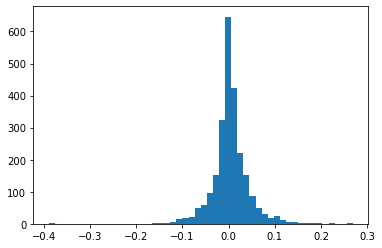

In [267]:
plt.hist(df['pct_change'],bins= 50)


#plt.xlabel('Smarts')
#plt.ylabel('Probability')
#plt.title('Histogram of IQ')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
#plt.grid(True)
plt.show()

In [268]:
np.std(df['pct_change'])

0.039221992853033565

In [256]:
e.unstack().describe()
df['pct_change'].describe()

count    2436.000000
mean        0.003040
std         0.039230
min        -0.389801
25%        -0.012494
50%         0.002048
75%         0.018900
max         0.269211
Name: pct_change, dtype: float64

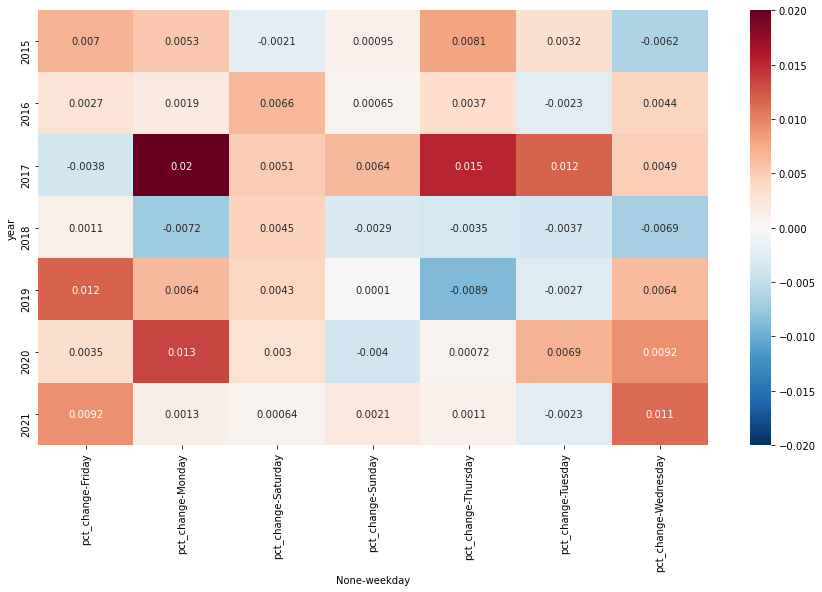

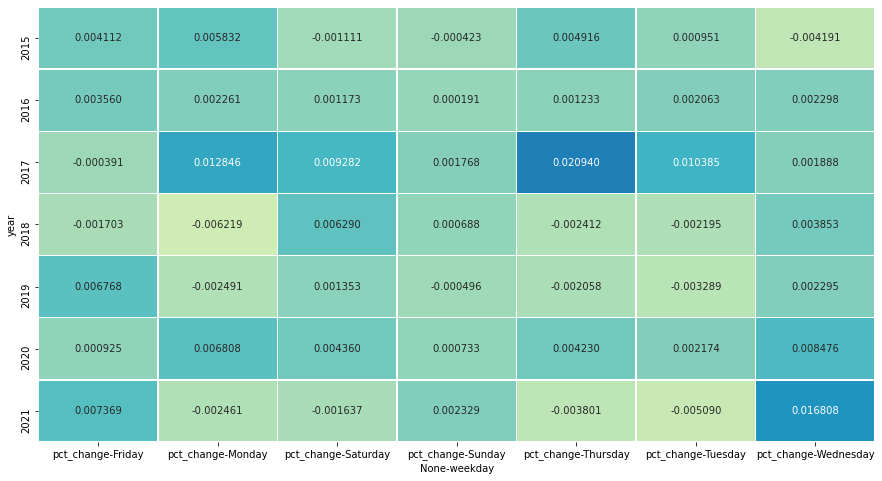

In [299]:
plt.figure(figsize=(15,8))

heat_map_mean = sns.heatmap(f_mean, annot=True, cmap='RdBu_r', vmin = -0.02, vmax = 0.02)
plt.show()
plt.figure(figsize=(15,8))
heat_map_median = sns.heatmap(f_median
                                , annot=True
                                , linewidths=.5
                                , cmap="YlGnBu"
                                ,cbar=False
                                , fmt="f"
                                ,center = .01
                                , vmin = -0.02
                                , vmax = 0.02
                                )
xticklabels, yticklabels = 'x', 'y'

plt.show()




In [231]:
e.unstack().unstack()


                  weekday    year
mean  pct_change  Friday     2015    0.006972
                             2016    0.002680
                             2017   -0.003814
                             2018    0.001128
                             2019    0.011854
                                       ...   
sum   pct_change  Wednesday  2017    0.252715
                             2018   -0.357293
                             2019    0.332338
                             2020    0.485351
                             2021    0.484133
Length: 147, dtype: float64

In [232]:
g.head()

,weekday,pct_change
0,Friday,0.004315
1,Monday,0.006000
2,Saturday,0.003354
3,Sunday,0.000439
4,Thursday,0.002250


In [233]:
# create a copy of the dataframe, and add columns for month and year
df_m = df_neu
df_m['weekofyear'] = [i.month for i in df_m.index]
df_m['year'] = [i.year for i in df_m.index]
# group by month and year, get the average
df_m = df_m.groupby(['weekofyear', 'year']).mean()

AttributeError: 'int' object has no attribute 'month'

In [ ]:
df_m

close  pct_change  quarter  weekofyear  day_of_month  \
month year                                                                
1     2016    410.096774   -0.004068      1.0    7.387097          16.0   
      2017    910.848387    0.001024      1.0    4.258065          16.0   
      2018  12930.065161   -0.008058      1.0    2.741935          16.0   
      2019   3658.230645   -0.002180      1.0    2.870968          16.0   
      2020   8367.920000    0.008980      1.0         3.0          16.0   
...                  ...         ...      ...         ...           ...   
12    2016    823.800323    0.008725      4.0   50.129032          16.0   
      2017  14994.410323    0.013719      4.0   50.258065          16.0   
      2018   3661.034839   -0.001276      4.0   48.741935          16.0   
      2019   7245.612258   -0.001342      4.0   47.225806          16.0   
      2020  21986.161613    0.013115      4.0   50.870968          16.0   

            dayofweek  
month year             
1     2016   3.193548  
      2017   2.935484  
      2018   2.806452  
      2019   2.903226  
      2020   3.000000  
...               ...  
12    2016   3.096774  
      2017   3.193548  
      2018   3.064516  
      2019   2.935484  
      2020   2.903226  

[81 rows x 6 columns]

In [ ]:
df_m = df_m.unstack(level=1).pct_change
df_m

<bound method NDFrame.pct_change of             close                                                        \
year         2015        2016          2017          2018          2019   
month                                                                     
1             NaN  410.096774    910.848387  12930.065161   3658.230645   
2      245.265000  403.044138   1064.917857   9394.117143   3658.616786   
3      268.569355  414.835161   1127.017742   8984.952903   3924.058387   
4      235.063333  434.051667   1212.252000   8024.289333   5146.174667   
5      236.161935  460.799677   1876.060968   8427.182581   7285.205806   
6      237.416000  643.175667   2619.935000   6770.758000   9395.695333   
7      279.604194  660.655484   2508.804839   7123.002258  10653.706452   
8      251.136452  577.249032   3865.452258   6678.380645  10633.105161   
9      233.459333  604.052000   4086.753333   6584.677667   9788.515333   
10     265.337742  640.413226   5345.260968   6413.571290   8380